In [ ]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing  
import seaborn as sb
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
import statsmodels.formula.api as smf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set = pd.read_csv('/content/drive/MyDrive/IndexCoop Capstone/DPI analysis/datasets/DPI_dataset_final_Final.csv', index_col='Date')
data_set = data_set.reset_index() 
data_set 

,Date,usd_volume,av,aum,token_a_amount,net_flow,UNI_price,AAVE_price,MKR_price,SNX_price,...,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ,SOFR
0,2020-10-13,9.408115e+05,4.920000e+06,13413076.12,5865.240742,314475.05190,3.403257,51.136552,581.773174,4.537299,...,2.98,23.97,0.79,80.4,55.4,4.8,0.96,3511.93,11863.90,0.09
1,2020-10-14,1.080000e+06,4.960000e+06,14039166.27,5581.629425,729329.67920,3.256042,52.657986,578.352472,4.451809,...,2.98,23.97,0.79,80.4,55.4,4.8,0.97,3488.67,11768.73,0.09
2,2020-10-15,1.300000e+06,4.540000e+06,14293954.95,6430.021359,861171.96300,3.056167,47.815486,564.597854,4.150760,...,2.98,23.97,0.83,80.4,55.4,4.8,0.93,3483.34,11713.87,0.10
3,2020-10-16,8.884948e+05,3.740000e+06,13884925.20,4341.712775,344120.71360,3.139778,41.638785,548.252076,3.987229,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
4,2020-10-17,6.013777e+05,1.650000e+06,13584918.72,4010.875556,-30418.51613,3.047424,41.185764,552.822896,3.938792,...,2.98,23.97,0.85,80.4,55.4,4.8,0.87,3483.81,11671.56,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2022-09-23,1.116083e+05,2.003085e+05,28167929.92,801.573962,0.00000,5.843785,75.897042,657.364250,2.463340,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
711,2022-09-24,1.004768e+05,1.868585e+05,28644520.91,568.615424,0.00000,5.917444,76.513681,680.139806,2.490632,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
712,2022-09-25,5.423181e+04,1.846635e+05,28202207.10,385.704346,0.00000,5.836500,75.651299,693.700187,2.405306,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93,2.99
713,2022-09-26,5.487198e+05,2.340147e+05,27500377.94,3472.454571,-238218.46220,5.752431,74.858486,696.748826,2.304549,...,5.75,26.53,-0.16,58.2,52.8,5.2,-0.86,3655.04,10802.92,2.99


In [ ]:
data_set['Date']

0      2020-10-13
1      2020-10-14
2      2020-10-15
3      2020-10-16
4      2020-10-17
          ...    
710    2022-09-23
711    2022-09-24
712    2022-09-25
713    2022-09-26
714    2022-09-27
Name: Date, Length: 715, dtype: object

#Event Lists

In [ ]:
#DPI lanuched on 2020-Oct 

# So, some potential events=drivers could be 

event_list= {'US_left_Paris_Agrmnt' : '2020-11-04',
'Covid_Alpha_Mutant'  : '2020-12-18',
'Stimulus_Package_2300bln' : '2020-12-28',
'Biden_wins_election' : '2021-01-06',
'US_back_to_Paris_Agrmnt' : '2021-02-19',
'Covid_Delta_Mutant' : '2021-05-18',
'FED_anncmt_rate_0_25bp' : '2021-07-28',
'IMF_SDR_650bln' : '2021-08-23',
'Covid_Omicron_Mutant' : '2021-11-26',
'Russia_Ukraine_war_start' : '2022-02-24',
'FED_rate_1_25bp' : '2022-03-15',
'FED_rate_2_50bp' : '2022-05-03',
'FED_rate_3_75bp' : '2022-06-14',
'CPI_highest_increase' : '2022-07-13',
'FED_rate_4_75bp' : '2022-07-27',
'FED_rate_5_75bp' : '2022-09-21'
    
}
# US_left_Paris_Agrmnt = '2020-11-04'
# Covid_Alpha_Mutant  = '2020-12-18'
# Stimulus_Package_2300bln = '2020-12-28'
# Biden_wins_election = '2021-01-06'
# US_back_to_Paris_Agrmnt = '2021-02-19'
# Covid_Delta_Mutant = '2021-05-18'
# FED_anncmt_rate_0_25bp = '2021-07-28'
# IMF_SDR_650bln = '2021-08-23'
# Covid_Omicron_Mutant = '2021-11-26'
# Russia_Ukraine_war_start = '2022-02-24'
# FED_rate_1_25bp = '2022-03-15'
# FED_rate_2_50bp = '2022-05-03'
# FED_rate_3_75bp = '2022-06-14'
# CPI_highest_increase = '2022-07-13'
# FED_rate_4_75bp = '2022-07-27'
# FED_rate_5_75bp = '2022-09-21'

# event_list = []
# event_list.append(US_left_Paris_Agrmnt)
# event_list.append(Covid_Alpha_Mutant )
# event_list.append(Stimulus_Package_2300bln)
# event_list.append(Biden_wins_election)
# event_list.append(US_back_to_Paris_Agrmnt)
# event_list.append(Covid_Delta_Mutant)
# event_list.append(FED_anncmt_rate_0_25bp)
# event_list.append(IMF_SDR_650bln)
# event_list.append(Covid_Omicron_Mutant)
# event_list.append(Russia_Ukraine_war_start)
# event_list.append(FED_rate_1_25bp)
# event_list.append(FED_rate_2_50bp)
# event_list.append(FED_rate_3_75bp)
# event_list.append(CPI_highest_increase)
# event_list.append(FED_rate_4_75bp)
# event_list.append(FED_rate_5_75bp)


#Time window and select data

In [ ]:
def get_time_window(base_time, window_width):
  time = datetime.datetime.strptime(base_time, '%Y-%m-%d')
  forward_length = round(2/3*window_width)
  backward_length = round(1/3*window_width)
  start_date = (time - datetime.timedelta(days=backward_length)).date()
  end_date = (time + datetime.timedelta(days=forward_length)).date()
  start_date = datetime.datetime.strftime(start_date, '%Y-%m-%d')
  end_date = datetime.datetime.strftime(end_date, '%Y-%m-%d')
  return start_date, end_date 

In [ ]:
window_width = 30
get_time_window(list(event_list.values())[3], window_width)

('2020-12-27', '2021-01-26')

In [ ]:
def get_event_data(data_set, base_time, window_width):
  start_date, end_date = get_time_window(base_time, window_width)
  event_data = data_set[(data_set['Date'] >= start_date) & (data_set['Date'] <= end_date)]
  return event_data 

#data preprocessing

In [ ]:
from statsmodels.regression.linear_model import yule_walker
def processing_data(data_set):
  X = data_set.copy()
  X = X.reset_index()
  X.drop(['net_flow', 'Date'], axis = 1, inplace = True)
  # , 'CVX_price', 'DYDX_price', 'BNB_price', 'WBTC_price', 'PCE DEFM Index', 'USGG2YR Index', 'CCMP Index' 

  y = data_set['net_flow'].copy()

  X_scaled = pd.DataFrame(preprocessing.scale(X))
  X_scaled.columns = X.columns 
  # X_scaled.rename(columns = {'2yr_bond': 'USGG2YR', '10yr_bond': 'USGG10YR'}, inplace = True)
  #            'NYCNM1IR Index': 'NYCNM1IR_Index', 'CSIIUSD Index': 'CSIIUSD_Index', 
  #            'ECSURPUS Index': 'ECSURPUS_Index', 'CONSSENT Index': 'CONSSENT_Index',
  #            'NAPMPMI Index': 'NAPMPMI_Index', 'AHE YOY% Index': 'AHE_YOY_Index',
  #            'MSXAMSIL Index': 'MSXAMSIL_Index', 'SPX Index': 'SPX_Index'}, inplace = True)
  
  return X_scaled, y
  

#cross validation

In [ ]:
def cross_validation_score(classifier, X_train, y_train):
  results = []
  name = classifier.__class__.__name__.split('.')[-1]
    
  r2 = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring='r2')
  rmse = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
  results.append([name, r2.mean(), rmse.mean()])
        
  return results

#feature importance

In [ ]:
def feature_importance(classifier, X_train, y_train, cv_times):
  importance_array = []
  mean_importance = []
  name = classifier.__class__.__name__.split('.')[-1]

  models = cross_validate(estimator=classifier, X=X_train, y=y_train, cv=cv_times, return_estimator = True)
  
  for i in range(cv_times):
    importance = models['estimator'][i].feature_importances_
    importance_array.append(importance)
  for j in range(X_train.shape[1]):
    temp = 0
    for i in range(cv_times):
      temp = temp + importance_array[i][j]
    mean_importance.append(temp/cv_times)
  return mean_importance

In [ ]:
def plot_importance(index_array, importance, time_list, i):
  FI = pd.Series(importance, index = index_array)
  FI = FI.sort_values(ascending = False)
  FI = FI[:8]
  title = list(time_list.keys())[i]
  fig = plt.figure(figsize=(12,5))
  plt.bar(FI.index,FI.values,color="blue")
  plt.xlabel('features')
  plt.ylabel('importances')
  plt.title(title)
  plt.show()

#comparing different time windows results

In [ ]:
def show_results(data_set, time_list, classifier):
  for i in range(len(time_list)):
    temp_set = get_event_data(data_set, list(event_list.values())[3], window_width)
    X_train, y_train= processing_data(temp_set)
    feature_names = X_train.columns.values
    results = cross_validation_score(classifier, X_train, y_train)
    importance = feature_importance(classifier, X_train, y_train, 5) 
    plot_importance(feature_names, importance, time_list, i)
  return

##Random Forest

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


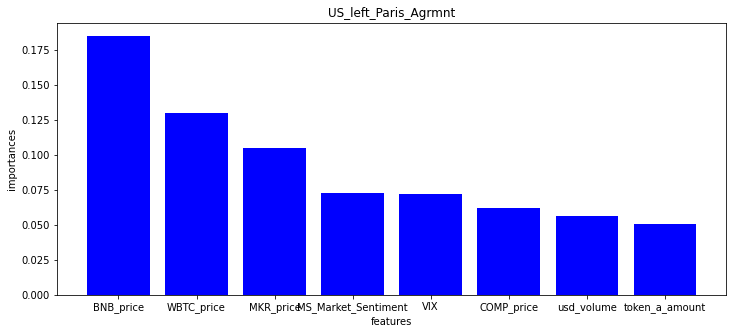

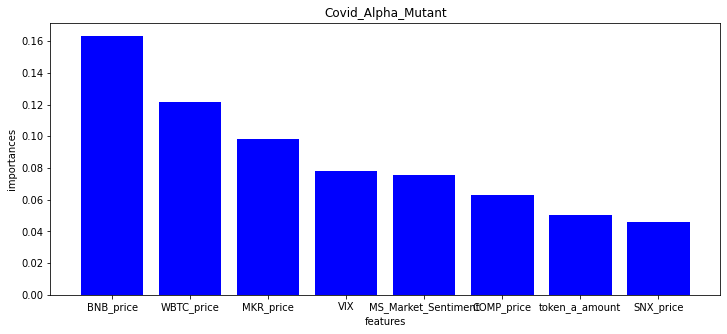

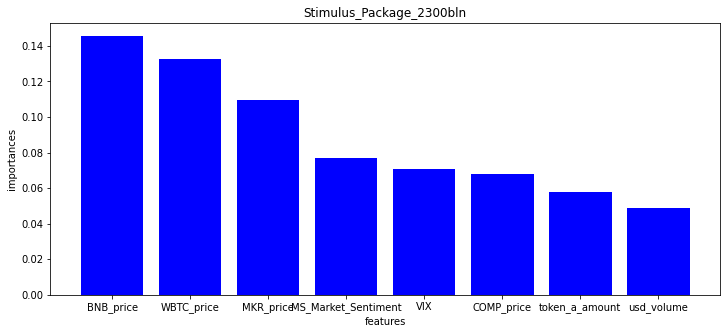

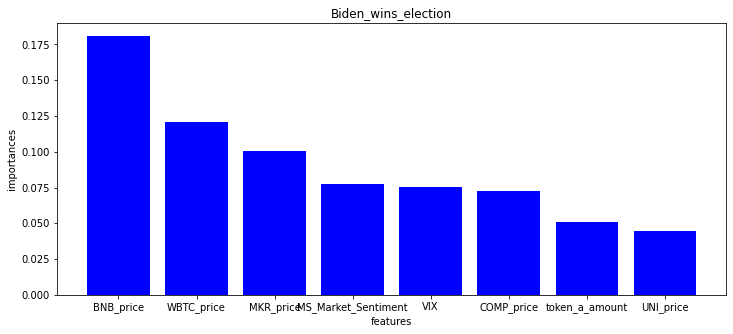

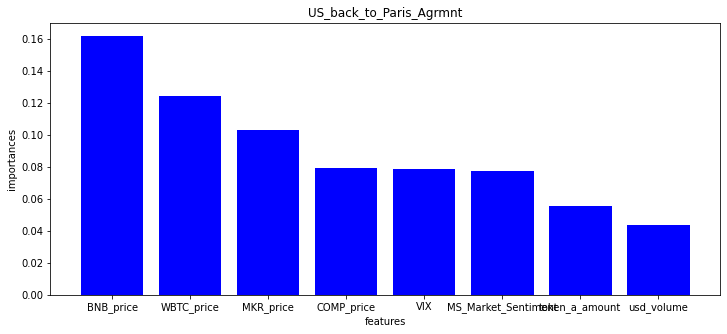

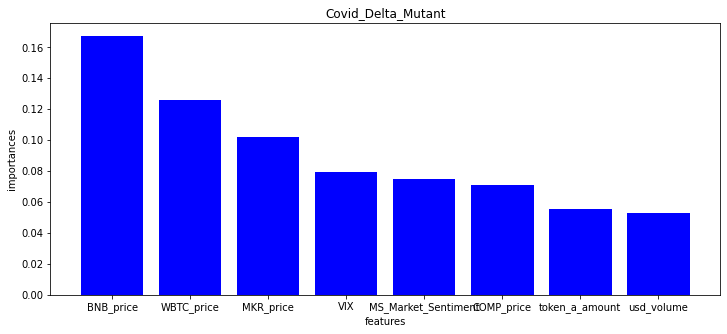

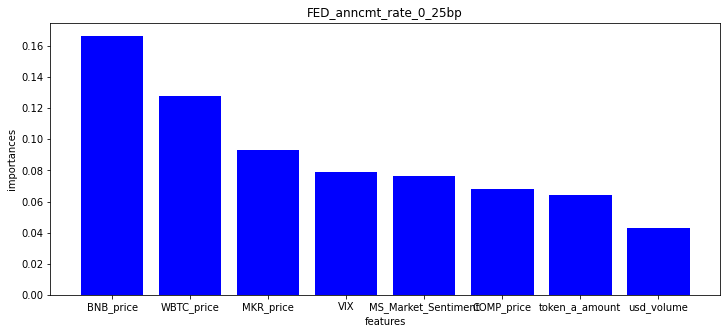

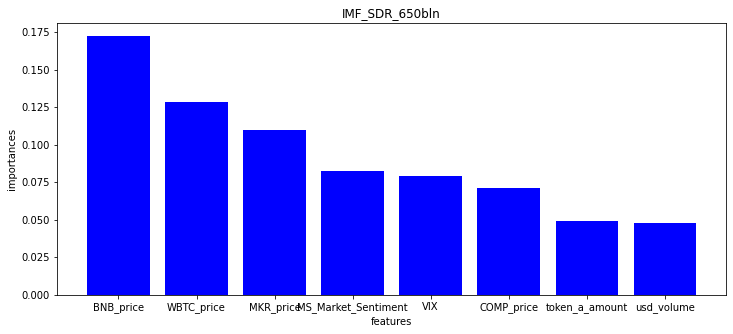

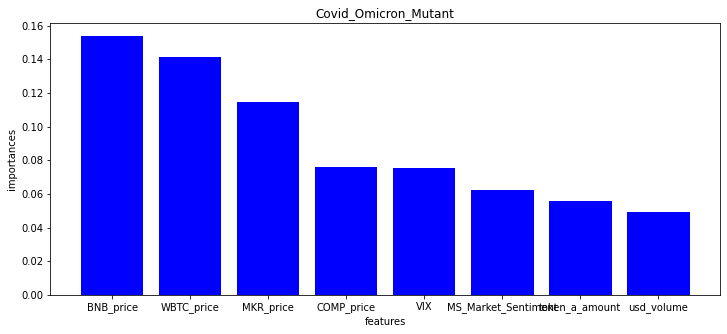

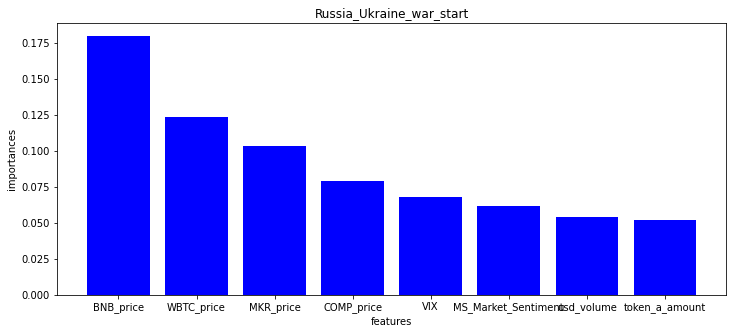

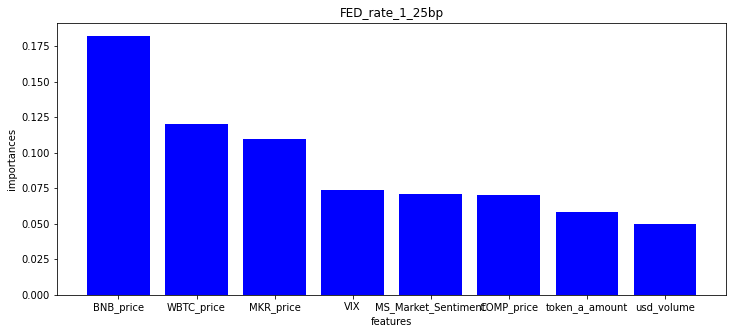

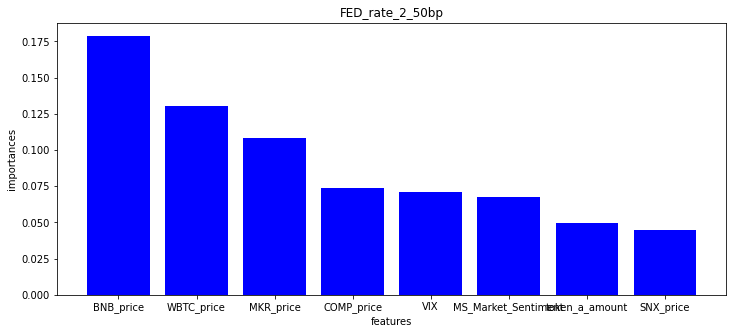

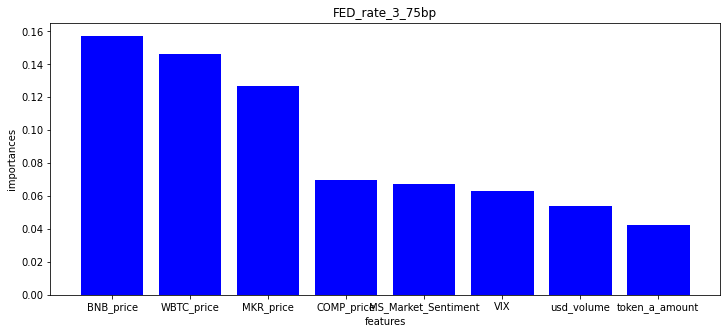

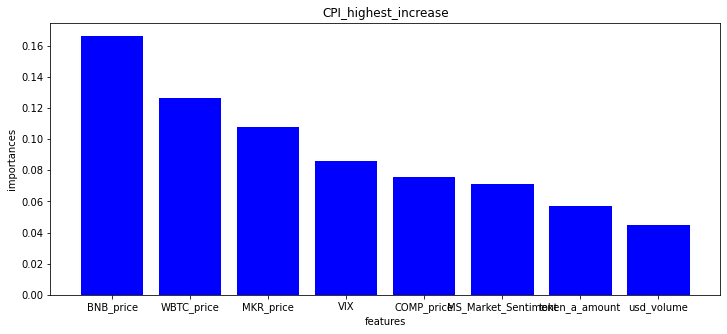

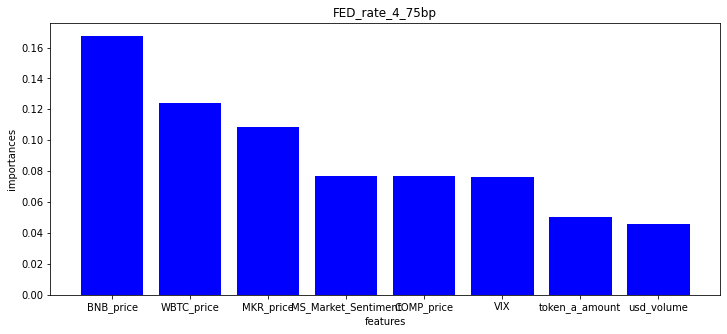

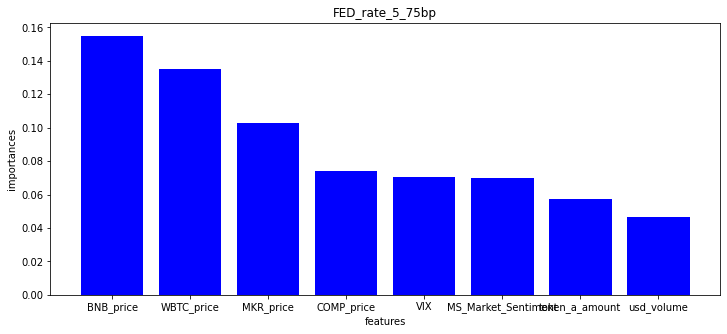

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

rf_clf = RandomForestRegressor()
pprint(rf_clf.get_params())

show_results(data_set, event_list, rf_clf) 

##Grid Search

In [ ]:
def grid_search(data_set, time_list, classifier):
  for i in range(len(time_list)):
    temp_set = get_event_data(data_set, list(event_list.values())[3], window_width)
    X_train, y_train= processing_data(temp_set)
    
    best_model = classifier.fit(X_train, y_train)
    pprint(best_model.best_estimator_)
  return

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
 
classifier = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 120, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=42)
grid_search(data_set, event_list, rf_random)


RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=80)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=88)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=115)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=102)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=88)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=93)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=115)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=111)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=102)
RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_sp

##AIC

In [ ]:
def forward_select(X, y):
  data = pd.concat([X, y], axis = 1)
  variate = set(X.columns)
  selected = []
  # set the scores to be infinite
  current_score, best_new_score = float('inf'), float('inf')
  # perform the forward selection
  while variate:
    aic_with_variate = []
    for candidate in variate:
      # print(candidate)
      # set the regression model
      formula = "{}~{}".format(y.columns[0], "+".join(selected + [candidate]))
      # print(formula)
      aic = smf.ols(formula = formula, data = data).fit().aic
      aic_with_variate.append((aic,candidate))
    aic_with_variate.sort(reverse = True)
    best_new_score, best_candidate = aic_with_variate.pop()
    if current_score > best_new_score:
      variate.remove(best_candidate)
      selected.append(best_candidate)
      current_score = best_new_score
      print("AIC is {}, continuing!".format(current_score))
    else:
      print("Forward Selection Done")
      break
  # final regression model
  formula = "{}~{}".format(y.columns[0], "+".join(selected))
  print("Final Regression model is {}".format(formula))
  model = smf.ols(formula = formula, data = data).fit()
  return(model)

In [ ]:
data_set.rename(columns = {'2yr_bond': 'USGG2YR', '10yr_bond': 'USGG10YR'}, inplace = True)

In [ ]:
def show_aic_results(data_set, time_list):
  for i in range(len(time_list)):
    temp_set = get_event_data(data_set,list(event_list.values())[3], window_width)
    X_train, y_train= processing_data(temp_set)
    y_train = pd.DataFrame(y_train).reset_index()
    del y_train["index"]
    aic_train = forward_select(X_train, y_train)
    aic_train.summary()
  return

In [ ]:
m = show_aic_results(data_set, event_list) 

AIC is 905.2695872465448, continuing!
AIC is 904.8247497140806, continuing!
AIC is 904.7987628344096, continuing!
AIC is 899.5840343740231, continuing!
AIC is 892.3007105329963, continuing!
AIC is 891.6919968329232, continuing!
AIC is 887.1223457095621, continuing!
AIC is 886.3190723581448, continuing!
AIC is 885.3420290285571, continuing!
Forward Selection Done
Final Regression model is net_flow~BNB_price+USGG2YR+token_a_amount+usd_volume+UNI_price+MS_Market_Sentiment+VIX+Economic_surprises+av
AIC is 905.2695872465448, continuing!
AIC is 904.8247497140806, continuing!
AIC is 904.7987628344096, continuing!
AIC is 899.5840343740231, continuing!
AIC is 892.3007105329963, continuing!
AIC is 891.6919968329232, continuing!
AIC is 887.1223457095621, continuing!
AIC is 886.3190723581448, continuing!
AIC is 885.3420290285571, continuing!
Forward Selection Done
Final Regression model is net_flow~BNB_price+USGG2YR+token_a_amount+usd_volume+UNI_price+MS_Market_Sentiment+VIX+Economic_surprises+av


#Final model

In [ ]:
def regression_cross_validation_score(regressor, x, y, cv_times=5):
  results = []
  name = regressor.__class__.__name__.split('.')[-1]

  r2 = cross_val_score(estimator=regressor, X=x, y=y, cv=cv_times, scoring='r2')
  results.append([name, r2.mean()])

  return results

In [ ]:
rf_clf = RandomForestRegressor()
regression_cross_validation_score(rf_clf, X, y, cv_times=5)

NameError: ignored